## 1. Meet Dr. Ignaz Semmelweis
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/img/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/datasets/ignaz_semmelweis_1860.jpeg">
-->
<p>This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about <em>childbed fever</em>: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and <em>wash their hands</em>!</p>
<p>In this notebook, we're going to reanalyze the data that made Semmelweis discover the importance of <em>handwashing</em>. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.</p>

In [1]:
#  Importing modules
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv("datasets/yearly_deaths_by_clinic.csv")

# Print out yearly
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


## 2. The alarming number of deaths
<p>The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an <em>alarming</em> number of women died as the result of childbirth, most of them from childbed fever.</p>
<p>We see this more clearly if we look at the <em>proportion of deaths</em> out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.</p>

In [2]:
# Calculate proportion of deaths per no. births
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]

# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = yearly[yearly["clinic"] == "clinic 1"]
clinic_2 = yearly[yearly["clinic"] == "clinic 2"]

# Print out clinic_1
clinic_1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


## 3. Death at the clinics
<p>If we now plot the proportion of deaths at both Clinic 1 and Clinic 2  we'll see a curious pattern…</p>

<AxesSubplot:xlabel='year', ylabel='Proportion deaths'>

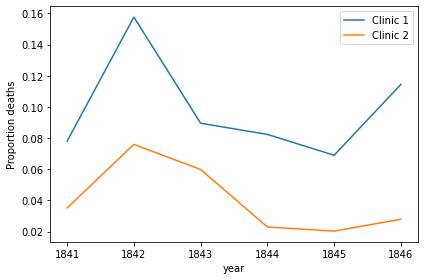

In [7]:
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = clinic_1.plot(x="year", y="proportion_deaths", label="Clinic 1")
clinic_2.plot(x="year", y="proportion_deaths", label="Clinic 2", ax=ax, ylabel="Proportion deaths")

## 4. The handwashing begins
<p>Why is the proportion of deaths consistently so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. </p>
<p>Semmelweis started to suspect that something on the corpses spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: <em>Wash your hands!</em> This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time. </p>
<p>Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.</p>

In [8]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv("datasets/monthly_deaths.csv", parse_dates=["date"])

# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

# Print out the first rows in monthly
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


## 5. The effect of handwashing
<p>With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!</p>

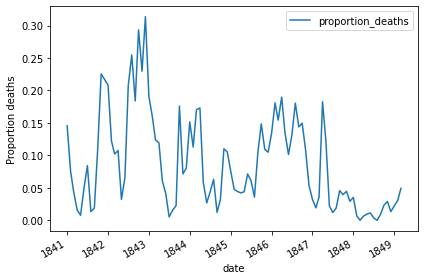

In [9]:
# Plot monthly proportion of deaths
ax = monthly.plot(x="date", y="proportion_deaths", ylabel="Proportion deaths")

## 6. The effect of handwashing highlighted
<p>Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory. </p>
<p>The effect of handwashing is made even more clear if we highlight this in the graph.</p>

<AxesSubplot:xlabel='date', ylabel='Proportion deaths'>

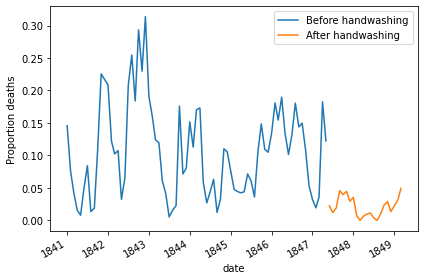

In [10]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x="date", y="proportion_deaths",
                         label="Before handwashing")
after_washing.plot(x="date", y="proportion_deaths",
                   label="After handwashing", ax=ax, ylabel="Proportion deaths")

## 7. More handwashing, fewer deaths?
<p>Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?</p>

In [11]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08395660751183336

## 8. A Bootstrap analysis of Semmelweis handwashing data
<p>It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards). </p>
<p>To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using the bootstrap method).</p>

In [13]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    print(boot_before)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

44    0.032258
42    0.063197
14    0.107438
31    0.022624
5     0.050000
        ...   
42    0.063197
15    0.032258
65    0.130952
50    0.042308
64    0.101504
Name: proportion_deaths, Length: 76, dtype: float64
66    0.180556
18    0.254630
67    0.143911
75    0.122449
20    0.293388
        ...   
7     0.013514
45    0.110204
61    0.154341
18    0.254630
6     0.084211
Name: proportion_deaths, Length: 76, dtype: float64
41    0.043689
27    0.060976
73    0.036066
27    0.060976
74    0.182692
        ...   
10    0.225532
67    0.143911
8     0.018779
18    0.254630
50    0.042308
Name: proportion_deaths, Length: 76, dtype: float64
47    0.075908
66    0.180556
1     0.075314
19    0.183857
37    0.170290
        ...   
34    0.080508
23    0.191176
27    0.060976
14    0.107438
7     0.013514
Name: proportion_deaths, Length: 76, dtype: float64
37    0.170290
39    0.058333
20    0.293388
45    0.110204
16    0.065934
        ...   
62    0.189723
19    0.183857
3     0.0156

Name: proportion_deaths, Length: 76, dtype: float64
63    0.134426
66    0.180556
44    0.032258
43    0.012245
53    0.061224
        ...   
61    0.154341
10    0.225532
62    0.189723
60    0.180887
41    0.043689
Name: proportion_deaths, Length: 76, dtype: float64
38    0.173077
40    0.026786
71    0.032154
69    0.107744
41    0.043689
        ...   
20    0.293388
32    0.176000
4     0.007843
5     0.050000
54    0.035857
Name: proportion_deaths, Length: 76, dtype: float64
56    0.148410
26    0.119298
69    0.107744
16    0.065934
71    0.032154
        ...   
26    0.119298
35    0.151639
69    0.107744
62    0.189723
46    0.105469
Name: proportion_deaths, Length: 76, dtype: float64
36    0.112840
62    0.189723
61    0.154341
41    0.043689
73    0.036066
        ...   
67    0.143911
71    0.032154
6     0.084211
2     0.043321
5     0.050000
Name: proportion_deaths, Length: 76, dtype: float64
67    0.143911
5     0.050000
31    0.022624
57    0.109434
3     0.015686
     

53    0.061224
33    0.071429
37    0.170290
66    0.180556
57    0.109434
        ...   
35    0.151639
19    0.183857
22    0.313808
70    0.053691
25    0.124060
Name: proportion_deaths, Length: 76, dtype: float64
33    0.071429
44    0.032258
51    0.043919
72    0.019231
54    0.035857
        ...   
69    0.107744
45    0.110204
29    0.005236
64    0.101504
58    0.104869
Name: proportion_deaths, Length: 76, dtype: float64
72    0.019231
0     0.145669
3     0.015686
13    0.102273
28    0.040816
        ...   
32    0.176000
41    0.043689
20    0.293388
10    0.225532
26    0.119298
Name: proportion_deaths, Length: 76, dtype: float64
68    0.149606
60    0.180887
55    0.105485
24    0.159696
0     0.145669
        ...   
58    0.104869
65    0.130952
6     0.084211
22    0.313808
29    0.005236
Name: proportion_deaths, Length: 76, dtype: float64
31    0.022624
71    0.032154
62    0.189723
61    0.154341
10    0.225532
        ...   
1     0.075314
62    0.189723
30    0.0155

Name: proportion_deaths, Length: 76, dtype: float64
64    0.101504
71    0.032154
1     0.075314
52    0.071429
62    0.189723
        ...   
74    0.182692
56    0.148410
37    0.170290
27    0.060976
61    0.154341
Name: proportion_deaths, Length: 76, dtype: float64
60    0.180887
35    0.151639
53    0.061224
63    0.134426
12    0.122186
        ...   
52    0.071429
60    0.180887
26    0.119298
53    0.061224
20    0.293388
Name: proportion_deaths, Length: 76, dtype: float64
10    0.225532
59    0.133929
27    0.060976
66    0.180556
33    0.071429
        ...   
2     0.043321
66    0.180556
55    0.105485
68    0.149606
71    0.032154
Name: proportion_deaths, Length: 76, dtype: float64
14    0.107438
6     0.084211
41    0.043689
23    0.191176
41    0.043689
        ...   
35    0.151639
3     0.015686
67    0.143911
27    0.060976
58    0.104869
Name: proportion_deaths, Length: 76, dtype: float64
48    0.047445
32    0.176000
64    0.101504
33    0.071429
48    0.047445
     

Name: proportion_deaths, Length: 76, dtype: float64
46    0.105469
62    0.189723
25    0.124060
55    0.105485
15    0.032258
        ...   
48    0.047445
34    0.080508
69    0.107744
65    0.130952
10    0.225532
Name: proportion_deaths, Length: 76, dtype: float64
41    0.043689
27    0.060976
70    0.053691
39    0.058333
27    0.060976
        ...   
54    0.035857
42    0.063197
60    0.180887
3     0.015686
25    0.124060
Name: proportion_deaths, Length: 76, dtype: float64
40    0.026786
48    0.047445
35    0.151639
22    0.313808
65    0.130952
        ...   
75    0.122449
46    0.105469
1     0.075314
46    0.105469
14    0.107438
Name: proportion_deaths, Length: 76, dtype: float64
8     0.018779
45    0.110204
71    0.032154
75    0.122449
3     0.015686
        ...   
62    0.189723
9     0.110169
4     0.007843
59    0.133929
57    0.109434
Name: proportion_deaths, Length: 76, dtype: float64
26    0.119298
66    0.180556
70    0.053691
11    0.208469
17    0.207792
     

Name: proportion_deaths, Length: 76, dtype: float64
2     0.043321
45    0.110204
51    0.043919
5     0.050000
38    0.173077
        ...   
13    0.102273
13    0.102273
75    0.122449
70    0.053691
10    0.225532
Name: proportion_deaths, Length: 76, dtype: float64
66    0.180556
48    0.047445
60    0.180887
65    0.130952
3     0.015686
        ...   
52    0.071429
37    0.170290
52    0.071429
22    0.313808
49    0.044521
Name: proportion_deaths, Length: 76, dtype: float64
16    0.065934
16    0.065934
73    0.036066
10    0.225532
25    0.124060
        ...   
17    0.207792
52    0.071429
17    0.207792
46    0.105469
59    0.133929
Name: proportion_deaths, Length: 76, dtype: float64
32    0.176000
6     0.084211
37    0.170290
63    0.134426
52    0.071429
        ...   
68    0.149606
46    0.105469
14    0.107438
30    0.015544
61    0.154341
Name: proportion_deaths, Length: 76, dtype: float64
29    0.005236
19    0.183857
75    0.122449
72    0.019231
48    0.047445
     

Name: proportion_deaths, Length: 76, dtype: float64
71    0.032154
72    0.019231
67    0.143911
42    0.063197
55    0.105485
        ...   
68    0.149606
15    0.032258
10    0.225532
65    0.130952
62    0.189723
Name: proportion_deaths, Length: 76, dtype: float64
7     0.013514
47    0.075908
7     0.013514
22    0.313808
64    0.101504
        ...   
65    0.130952
12    0.122186
59    0.133929
25    0.124060
68    0.149606
Name: proportion_deaths, Length: 76, dtype: float64
50    0.042308
69    0.107744
58    0.104869
61    0.154341
50    0.042308
        ...   
64    0.101504
21    0.229665
42    0.063197
8     0.018779
66    0.180556
Name: proportion_deaths, Length: 76, dtype: float64
36    0.112840
30    0.015544
36    0.112840
49    0.044521
21    0.229665
        ...   
33    0.071429
63    0.134426
75    0.122449
30    0.015544
20    0.293388
Name: proportion_deaths, Length: 76, dtype: float64
58    0.104869
3     0.015686
69    0.107744
62    0.189723
1     0.075314
     

Name: proportion_deaths, Length: 76, dtype: float64
55    0.105485
30    0.015544
22    0.313808
37    0.170290
9     0.110169
        ...   
5     0.050000
28    0.040816
4     0.007843
16    0.065934
38    0.173077
Name: proportion_deaths, Length: 76, dtype: float64
16    0.065934
38    0.173077
55    0.105485
48    0.047445
34    0.080508
        ...   
28    0.040816
58    0.104869
49    0.044521
32    0.176000
73    0.036066
Name: proportion_deaths, Length: 76, dtype: float64
18    0.254630
12    0.122186
60    0.180887
21    0.229665
32    0.176000
        ...   
29    0.005236
10    0.225532
26    0.119298
32    0.176000
65    0.130952
Name: proportion_deaths, Length: 76, dtype: float64
35    0.151639
35    0.151639
51    0.043919
58    0.104869
14    0.107438
        ...   
41    0.043689
36    0.112840
40    0.026786
63    0.134426
39    0.058333
Name: proportion_deaths, Length: 76, dtype: float64
0     0.145669
42    0.063197
19    0.183857
19    0.183857
30    0.015544
     

Name: proportion_deaths, Length: 76, dtype: float64
14    0.107438
12    0.122186
1     0.075314
55    0.105485
68    0.149606
        ...   
27    0.060976
3     0.015686
25    0.124060
14    0.107438
48    0.047445
Name: proportion_deaths, Length: 76, dtype: float64
24    0.159696
46    0.105469
5     0.050000
55    0.105485
58    0.104869
        ...   
30    0.015544
6     0.084211
29    0.005236
10    0.225532
21    0.229665
Name: proportion_deaths, Length: 76, dtype: float64
4     0.007843
16    0.065934
48    0.047445
70    0.053691
68    0.149606
        ...   
62    0.189723
13    0.102273
17    0.207792
1     0.075314
73    0.036066
Name: proportion_deaths, Length: 76, dtype: float64
33    0.071429
60    0.180887
45    0.110204
36    0.112840
57    0.109434
        ...   
35    0.151639
30    0.015544
62    0.189723
19    0.183857
48    0.047445
Name: proportion_deaths, Length: 76, dtype: float64
2     0.043321
12    0.122186
16    0.065934
57    0.109434
40    0.026786
     

Name: proportion_deaths, Length: 76, dtype: float64
24    0.159696
45    0.110204
60    0.180887
31    0.022624
52    0.071429
        ...   
73    0.036066
40    0.026786
61    0.154341
63    0.134426
62    0.189723
Name: proportion_deaths, Length: 76, dtype: float64
38    0.173077
18    0.254630
48    0.047445
62    0.189723
42    0.063197
        ...   
67    0.143911
50    0.042308
16    0.065934
30    0.015544
13    0.102273
Name: proportion_deaths, Length: 76, dtype: float64
36    0.112840
22    0.313808
0     0.145669
69    0.107744
72    0.019231
        ...   
52    0.071429
25    0.124060
69    0.107744
21    0.229665
2     0.043321
Name: proportion_deaths, Length: 76, dtype: float64
16    0.065934
57    0.109434
61    0.154341
54    0.035857
44    0.032258
        ...   
51    0.043919
53    0.061224
19    0.183857
36    0.112840
58    0.104869
Name: proportion_deaths, Length: 76, dtype: float64
11    0.208469
71    0.032154
46    0.105469
16    0.065934
68    0.149606
     

1     0.075314
9     0.110169
21    0.229665
61    0.154341
38    0.173077
        ...   
10    0.225532
44    0.032258
23    0.191176
0     0.145669
54    0.035857
Name: proportion_deaths, Length: 76, dtype: float64
12    0.122186
61    0.154341
12    0.122186
67    0.143911
19    0.183857
        ...   
44    0.032258
72    0.019231
69    0.107744
13    0.102273
45    0.110204
Name: proportion_deaths, Length: 76, dtype: float64
11    0.208469
28    0.040816
13    0.102273
39    0.058333
33    0.071429
        ...   
13    0.102273
38    0.173077
62    0.189723
51    0.043919
53    0.061224
Name: proportion_deaths, Length: 76, dtype: float64
72    0.019231
22    0.313808
24    0.159696
53    0.061224
41    0.043689
        ...   
0     0.145669
42    0.063197
53    0.061224
4     0.007843
41    0.043689
Name: proportion_deaths, Length: 76, dtype: float64
59    0.133929
27    0.060976
10    0.225532
63    0.134426
75    0.122449
        ...   
21    0.229665
71    0.032154
9     0.1101

Name: proportion_deaths, Length: 76, dtype: float64
53    0.061224
40    0.026786
69    0.107744
26    0.119298
58    0.104869
        ...   
5     0.050000
26    0.119298
48    0.047445
49    0.044521
14    0.107438
Name: proportion_deaths, Length: 76, dtype: float64
27    0.060976
57    0.109434
64    0.101504
30    0.015544
16    0.065934
        ...   
44    0.032258
0     0.145669
63    0.134426
71    0.032154
58    0.104869
Name: proportion_deaths, Length: 76, dtype: float64
73    0.036066
43    0.012245
31    0.022624
47    0.075908
48    0.047445
        ...   
65    0.130952
50    0.042308
1     0.075314
4     0.007843
40    0.026786
Name: proportion_deaths, Length: 76, dtype: float64
7     0.013514
66    0.180556
30    0.015544
53    0.061224
9     0.110169
        ...   
46    0.105469
33    0.071429
38    0.173077
10    0.225532
68    0.149606
Name: proportion_deaths, Length: 76, dtype: float64
3     0.015686
15    0.032258
32    0.176000
67    0.143911
45    0.110204
     

Name: proportion_deaths, Length: 76, dtype: float64
37    0.170290
54    0.035857
9     0.110169
62    0.189723
8     0.018779
        ...   
70    0.053691
60    0.180887
2     0.043321
7     0.013514
8     0.018779
Name: proportion_deaths, Length: 76, dtype: float64
32    0.176000
0     0.145669
54    0.035857
30    0.015544
36    0.112840
        ...   
30    0.015544
19    0.183857
26    0.119298
0     0.145669
30    0.015544
Name: proportion_deaths, Length: 76, dtype: float64
16    0.065934
44    0.032258
23    0.191176
69    0.107744
4     0.007843
        ...   
13    0.102273
23    0.191176
57    0.109434
12    0.122186
13    0.102273
Name: proportion_deaths, Length: 76, dtype: float64
54    0.035857
65    0.130952
32    0.176000
12    0.122186
10    0.225532
        ...   
57    0.109434
74    0.182692
6     0.084211
38    0.173077
45    0.110204
Name: proportion_deaths, Length: 76, dtype: float64
0     0.145669
49    0.044521
4     0.007843
8     0.018779
19    0.183857
     

Name: proportion_deaths, Length: 76, dtype: float64
21    0.229665
64    0.101504
42    0.063197
70    0.053691
69    0.107744
        ...   
21    0.229665
12    0.122186
72    0.019231
63    0.134426
53    0.061224
Name: proportion_deaths, Length: 76, dtype: float64
5     0.050000
44    0.032258
60    0.180887
6     0.084211
54    0.035857
        ...   
72    0.019231
45    0.110204
68    0.149606
0     0.145669
50    0.042308
Name: proportion_deaths, Length: 76, dtype: float64
26    0.119298
73    0.036066
64    0.101504
73    0.036066
60    0.180887
        ...   
18    0.254630
10    0.225532
56    0.148410
46    0.105469
51    0.043919
Name: proportion_deaths, Length: 76, dtype: float64
29    0.005236
5     0.050000
3     0.015686
39    0.058333
14    0.107438
        ...   
11    0.208469
54    0.035857
6     0.084211
27    0.060976
54    0.035857
Name: proportion_deaths, Length: 76, dtype: float64
20    0.293388
31    0.022624
7     0.013514
55    0.105485
22    0.313808
     

Name: proportion_deaths, Length: 76, dtype: float64
72    0.019231
54    0.035857
75    0.122449
73    0.036066
37    0.170290
        ...   
74    0.182692
28    0.040816
21    0.229665
70    0.053691
24    0.159696
Name: proportion_deaths, Length: 76, dtype: float64
22    0.313808
73    0.036066
2     0.043321
72    0.019231
14    0.107438
        ...   
21    0.229665
15    0.032258
11    0.208469
15    0.032258
1     0.075314
Name: proportion_deaths, Length: 76, dtype: float64
4     0.007843
65    0.130952
4     0.007843
54    0.035857
17    0.207792
        ...   
47    0.075908
25    0.124060
75    0.122449
57    0.109434
60    0.180887
Name: proportion_deaths, Length: 76, dtype: float64
13    0.102273
38    0.173077
66    0.180556
37    0.170290
30    0.015544
        ...   
40    0.026786
32    0.176000
1     0.075314
43    0.012245
28    0.040816
Name: proportion_deaths, Length: 76, dtype: float64
11    0.208469
46    0.105469
33    0.071429
41    0.043689
13    0.102273
     

Name: proportion_deaths, Length: 76, dtype: float64
34    0.080508
33    0.071429
45    0.110204
43    0.012245
40    0.026786
        ...   
63    0.134426
24    0.159696
47    0.075908
49    0.044521
65    0.130952
Name: proportion_deaths, Length: 76, dtype: float64
24    0.159696
5     0.050000
45    0.110204
54    0.035857
5     0.050000
        ...   
29    0.005236
36    0.112840
63    0.134426
17    0.207792
41    0.043689
Name: proportion_deaths, Length: 76, dtype: float64
67    0.143911
65    0.130952
8     0.018779
4     0.007843
59    0.133929
        ...   
21    0.229665
52    0.071429
18    0.254630
26    0.119298
43    0.012245
Name: proportion_deaths, Length: 76, dtype: float64
66    0.180556
49    0.044521
15    0.032258
34    0.080508
46    0.105469
        ...   
0     0.145669
48    0.047445
1     0.075314
54    0.035857
58    0.104869
Name: proportion_deaths, Length: 76, dtype: float64
28    0.040816
59    0.133929
2     0.043321
6     0.084211
37    0.170290
     

Name: proportion_deaths, Length: 76, dtype: float64
32    0.176000
16    0.065934
0     0.145669
47    0.075908
45    0.110204
        ...   
35    0.151639
6     0.084211
48    0.047445
42    0.063197
59    0.133929
Name: proportion_deaths, Length: 76, dtype: float64
55    0.105485
74    0.182692
31    0.022624
13    0.102273
60    0.180887
        ...   
13    0.102273
39    0.058333
35    0.151639
23    0.191176
46    0.105469
Name: proportion_deaths, Length: 76, dtype: float64
8     0.018779
66    0.180556
74    0.182692
43    0.012245
70    0.053691
        ...   
19    0.183857
61    0.154341
2     0.043321
53    0.061224
58    0.104869
Name: proportion_deaths, Length: 76, dtype: float64
15    0.032258
67    0.143911
32    0.176000
50    0.042308
50    0.042308
        ...   
62    0.189723
73    0.036066
36    0.112840
53    0.061224
61    0.154341
Name: proportion_deaths, Length: 76, dtype: float64
35    0.151639
54    0.035857
69    0.107744
45    0.110204
74    0.182692
     

Name: proportion_deaths, Length: 76, dtype: float64
51    0.043919
11    0.208469
36    0.112840
38    0.173077
35    0.151639
        ...   
62    0.189723
50    0.042308
73    0.036066
7     0.013514
43    0.012245
Name: proportion_deaths, Length: 76, dtype: float64
33    0.071429
12    0.122186
46    0.105469
4     0.007843
22    0.313808
        ...   
72    0.019231
27    0.060976
27    0.060976
4     0.007843
3     0.015686
Name: proportion_deaths, Length: 76, dtype: float64
28    0.040816
40    0.026786
4     0.007843
64    0.101504
73    0.036066
        ...   
60    0.180887
69    0.107744
67    0.143911
60    0.180887
28    0.040816
Name: proportion_deaths, Length: 76, dtype: float64
38    0.173077
56    0.148410
16    0.065934
39    0.058333
18    0.254630
        ...   
21    0.229665
56    0.148410
17    0.207792
58    0.104869
22    0.313808
Name: proportion_deaths, Length: 76, dtype: float64
7     0.013514
9     0.110169
13    0.102273
33    0.071429
70    0.053691
     

Name: proportion_deaths, Length: 76, dtype: float64
26    0.119298
64    0.101504
39    0.058333
19    0.183857
0     0.145669
        ...   
10    0.225532
40    0.026786
49    0.044521
53    0.061224
8     0.018779
Name: proportion_deaths, Length: 76, dtype: float64
19    0.183857
25    0.124060
55    0.105485
49    0.044521
9     0.110169
        ...   
9     0.110169
64    0.101504
3     0.015686
72    0.019231
55    0.105485
Name: proportion_deaths, Length: 76, dtype: float64
6     0.084211
55    0.105485
14    0.107438
13    0.102273
71    0.032154
        ...   
51    0.043919
67    0.143911
40    0.026786
45    0.110204
11    0.208469
Name: proportion_deaths, Length: 76, dtype: float64
4     0.007843
10    0.225532
31    0.022624
38    0.173077
57    0.109434
        ...   
24    0.159696
39    0.058333
38    0.173077
43    0.012245
25    0.124060
Name: proportion_deaths, Length: 76, dtype: float64
55    0.105485
66    0.180556
50    0.042308
74    0.182692
65    0.130952
     

Name: proportion_deaths, Length: 76, dtype: float64
20    0.293388
21    0.229665
13    0.102273
30    0.015544
20    0.293388
        ...   
53    0.061224
57    0.109434
24    0.159696
27    0.060976
35    0.151639
Name: proportion_deaths, Length: 76, dtype: float64
17    0.207792
58    0.104869
41    0.043689
29    0.005236
17    0.207792
        ...   
27    0.060976
47    0.075908
29    0.005236
21    0.229665
5     0.050000
Name: proportion_deaths, Length: 76, dtype: float64
2     0.043321
47    0.075908
26    0.119298
44    0.032258
58    0.104869
        ...   
42    0.063197
72    0.019231
62    0.189723
45    0.110204
48    0.047445
Name: proportion_deaths, Length: 76, dtype: float64
26    0.119298
59    0.133929
27    0.060976
30    0.015544
49    0.044521
        ...   
48    0.047445
26    0.119298
52    0.071429
46    0.105469
25    0.124060
Name: proportion_deaths, Length: 76, dtype: float64
18    0.254630
59    0.133929
26    0.119298
56    0.148410
32    0.176000
     

Name: proportion_deaths, Length: 76, dtype: float64
46    0.105469
1     0.075314
32    0.176000
19    0.183857
15    0.032258
        ...   
66    0.180556
16    0.065934
31    0.022624
39    0.058333
67    0.143911
Name: proportion_deaths, Length: 76, dtype: float64
56    0.148410
52    0.071429
36    0.112840
7     0.013514
56    0.148410
        ...   
27    0.060976
75    0.122449
3     0.015686
48    0.047445
66    0.180556
Name: proportion_deaths, Length: 76, dtype: float64
28    0.040816
55    0.105485
44    0.032258
38    0.173077
2     0.043321
        ...   
57    0.109434
30    0.015544
54    0.035857
60    0.180887
59    0.133929
Name: proportion_deaths, Length: 76, dtype: float64
73    0.036066
25    0.124060
70    0.053691
20    0.293388
36    0.112840
        ...   
2     0.043321
49    0.044521
23    0.191176
4     0.007843
13    0.102273
Name: proportion_deaths, Length: 76, dtype: float64
53    0.061224
28    0.040816
27    0.060976
57    0.109434
16    0.065934
     

Name: proportion_deaths, Length: 76, dtype: float64
62    0.189723
62    0.189723
72    0.019231
34    0.080508
30    0.015544
        ...   
53    0.061224
8     0.018779
17    0.207792
2     0.043321
59    0.133929
Name: proportion_deaths, Length: 76, dtype: float64
56    0.148410
22    0.313808
2     0.043321
50    0.042308
49    0.044521
        ...   
38    0.173077
46    0.105469
62    0.189723
56    0.148410
60    0.180887
Name: proportion_deaths, Length: 76, dtype: float64
11    0.208469
53    0.061224
60    0.180887
54    0.035857
61    0.154341
        ...   
15    0.032258
41    0.043689
24    0.159696
5     0.050000
33    0.071429
Name: proportion_deaths, Length: 76, dtype: float64
44    0.032258
25    0.124060
21    0.229665
34    0.080508
19    0.183857
        ...   
14    0.107438
47    0.075908
44    0.032258
23    0.191176
24    0.159696
Name: proportion_deaths, Length: 76, dtype: float64
9     0.110169
15    0.032258
37    0.170290
33    0.071429
71    0.032154
     

0     0.145669
41    0.043689
27    0.060976
0     0.145669
23    0.191176
        ...   
26    0.119298
51    0.043919
52    0.071429
14    0.107438
36    0.112840
Name: proportion_deaths, Length: 76, dtype: float64
27    0.060976
75    0.122449
72    0.019231
68    0.149606
10    0.225532
        ...   
11    0.208469
8     0.018779
6     0.084211
35    0.151639
8     0.018779
Name: proportion_deaths, Length: 76, dtype: float64
22    0.313808
9     0.110169
27    0.060976
66    0.180556
25    0.124060
        ...   
61    0.154341
57    0.109434
69    0.107744
34    0.080508
65    0.130952
Name: proportion_deaths, Length: 76, dtype: float64
23    0.191176
66    0.180556
56    0.148410
13    0.102273
67    0.143911
        ...   
5     0.050000
34    0.080508
32    0.176000
63    0.134426
52    0.071429
Name: proportion_deaths, Length: 76, dtype: float64
45    0.110204
65    0.130952
14    0.107438
49    0.044521
71    0.032154
        ...   
19    0.183857
50    0.042308
62    0.1897

Name: proportion_deaths, Length: 76, dtype: float64
61    0.154341
0     0.145669
55    0.105485
54    0.035857
49    0.044521
        ...   
3     0.015686
14    0.107438
60    0.180887
60    0.180887
38    0.173077
Name: proportion_deaths, Length: 76, dtype: float64
48    0.047445
75    0.122449
67    0.143911
17    0.207792
49    0.044521
        ...   
48    0.047445
23    0.191176
18    0.254630
4     0.007843
67    0.143911
Name: proportion_deaths, Length: 76, dtype: float64
24    0.159696
45    0.110204
75    0.122449
42    0.063197
28    0.040816
        ...   
2     0.043321
23    0.191176
28    0.040816
23    0.191176
35    0.151639
Name: proportion_deaths, Length: 76, dtype: float64
17    0.207792
36    0.112840
48    0.047445
50    0.042308
58    0.104869
        ...   
17    0.207792
42    0.063197
59    0.133929
11    0.208469
29    0.005236
Name: proportion_deaths, Length: 76, dtype: float64
55    0.105485
37    0.170290
61    0.154341
43    0.012245
38    0.173077
     

0.025   -0.101844
0.975   -0.067358
dtype: float64

## 9. The fate of Dr. Semmelweis
<p>So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.</p>
<p>The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as <em>bacteria</em>) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.</p>
<p>One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.</p>

In [0]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = False